In [1]:
import pandas as pd

In [3]:
d = pd.read_csv(r'C:\Users\phani\OneDrive\Desktop\DDS\ML\notebooks\data\auto-mpg.csv')
d.origin = pd.Categorical(d.origin.replace({1: 'america', 2: 'europe', 3: 'asia'}))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('white')
sns.set_palette('pastel')
plt.rcParams['figure.figsize'] = (8,6)

### Distribution of one variable

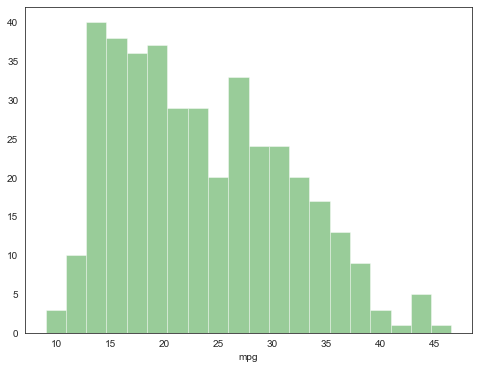

In [6]:
sns.distplot(d.mpg, kde=False, bins=20, color='green');

#### Change the aggregation level

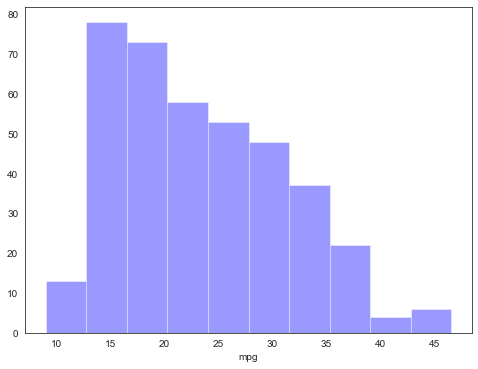

In [7]:
sns.distplot(d.mpg, kde=False, bins=10, color='blue');

#### Plot the Kernel Density Estimate

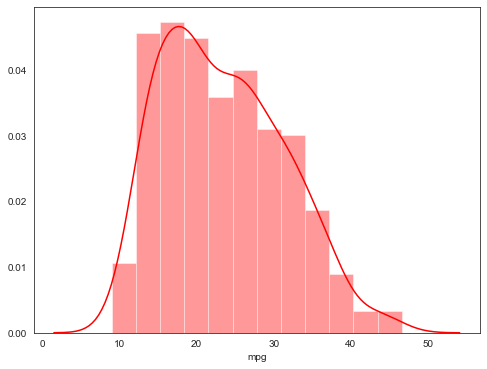

In [8]:
sns.distplot(d.mpg, color='red');

### Distribution of two variables

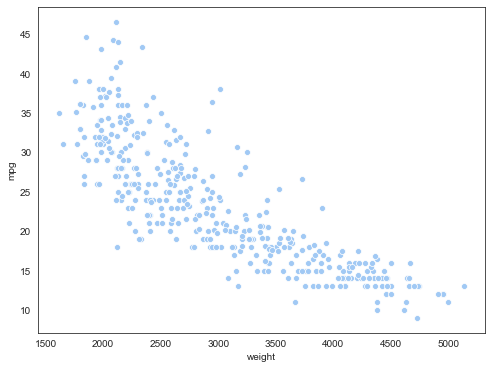

In [9]:
sns.scatterplot(x='weight', y='mpg', data=d);

#### Colour by a categorical variable

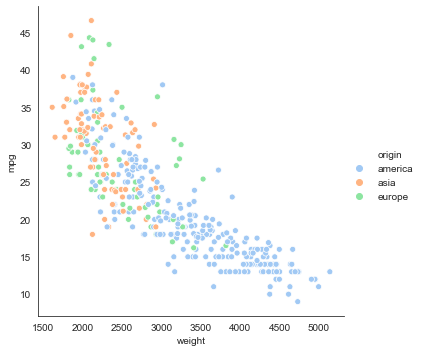

In [10]:
sns.relplot(x='weight', y='mpg', hue='origin', data=d);

#### Colour by a categorical variable and adjust the weight by a continuous one

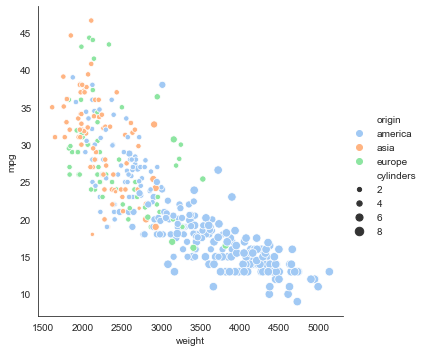

In [11]:
sns.relplot(x='weight', y='mpg', hue='origin', size='cylinders', data=d);

### Plot the correlation matrix

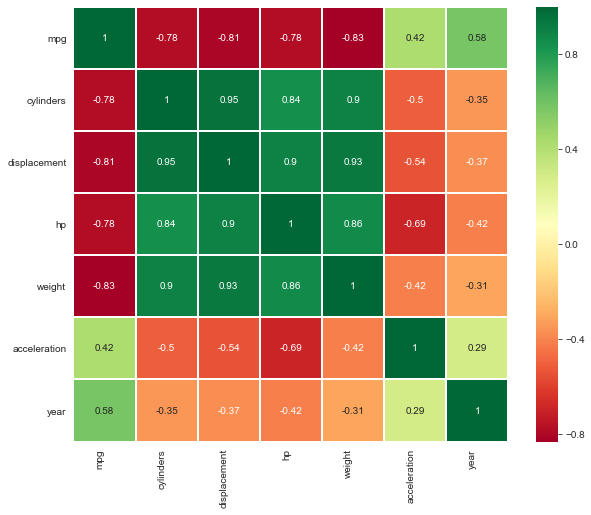

In [12]:
corr = d.corr()
fig, ax = plt.subplots(figsize=(10,8))
h = sns.heatmap(corr, cmap=plt.cm.RdYlGn, annot=True, linewidths=1, square=True, ax=ax)
ax.set_ylim(len(corr),0) # Due to a bug in Matplotlib 3.1.1
h.set_xticklabels(h.get_xticklabels(), rotation=90, ha='right')
h.set_yticklabels(h.get_yticklabels(), rotation=0, ha='right');

### Combine scatterplots and histograms

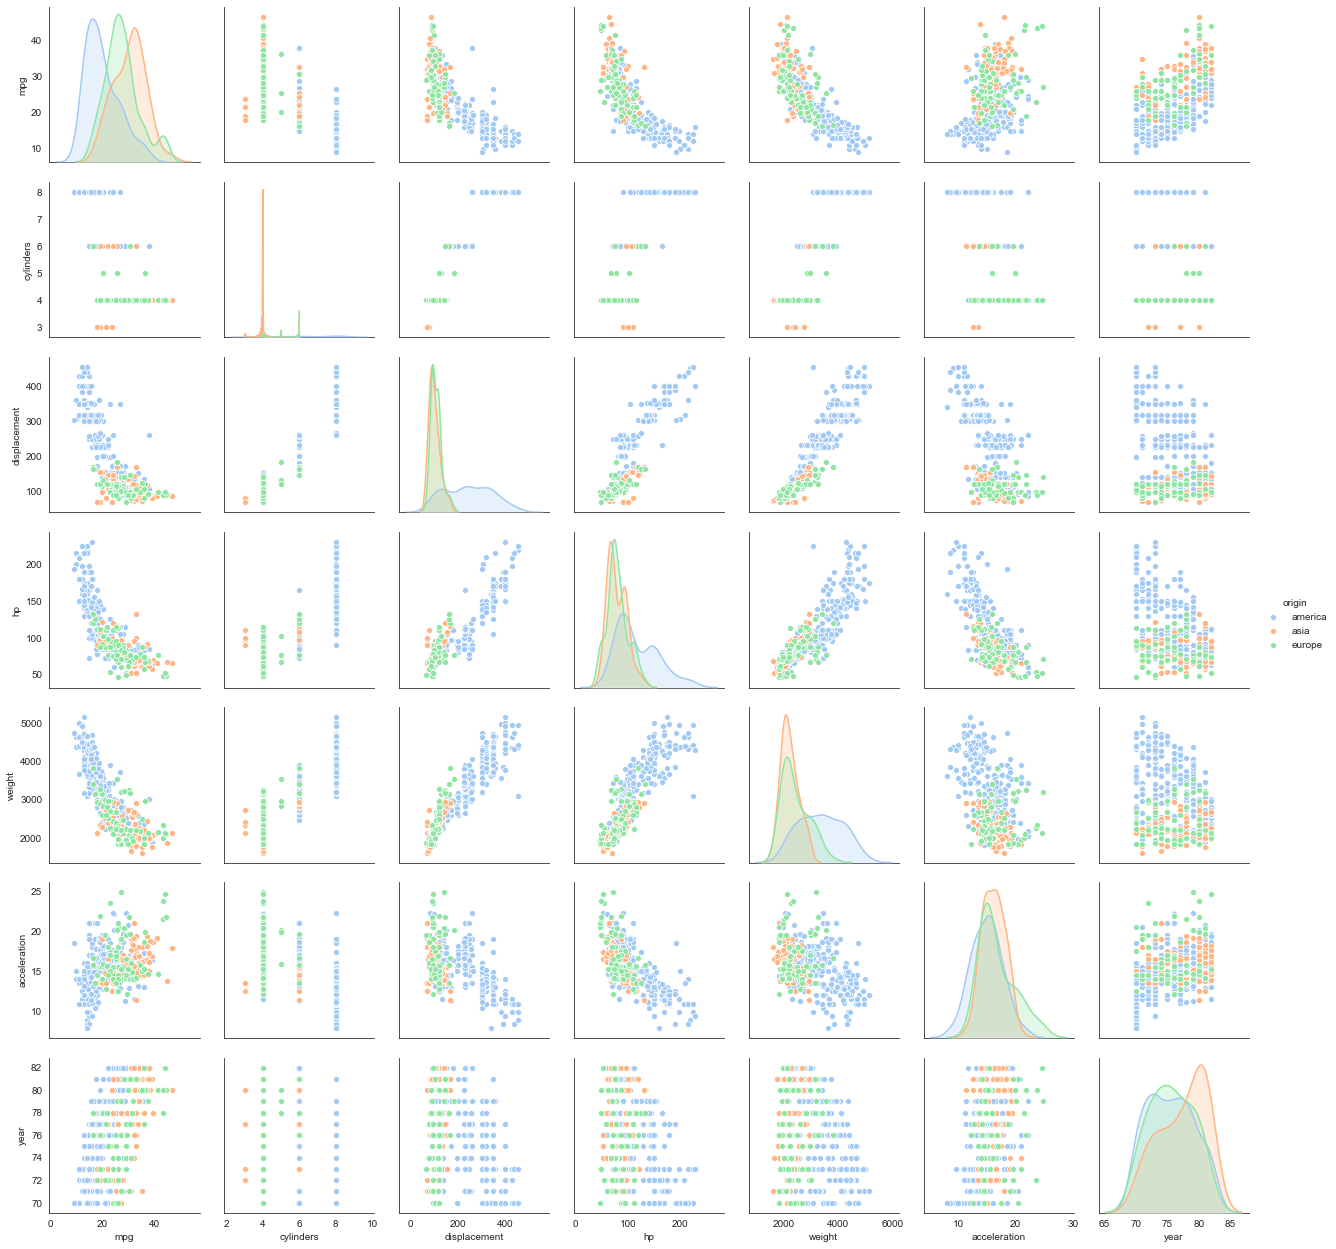

In [13]:
sns.pairplot(d, hue='origin');

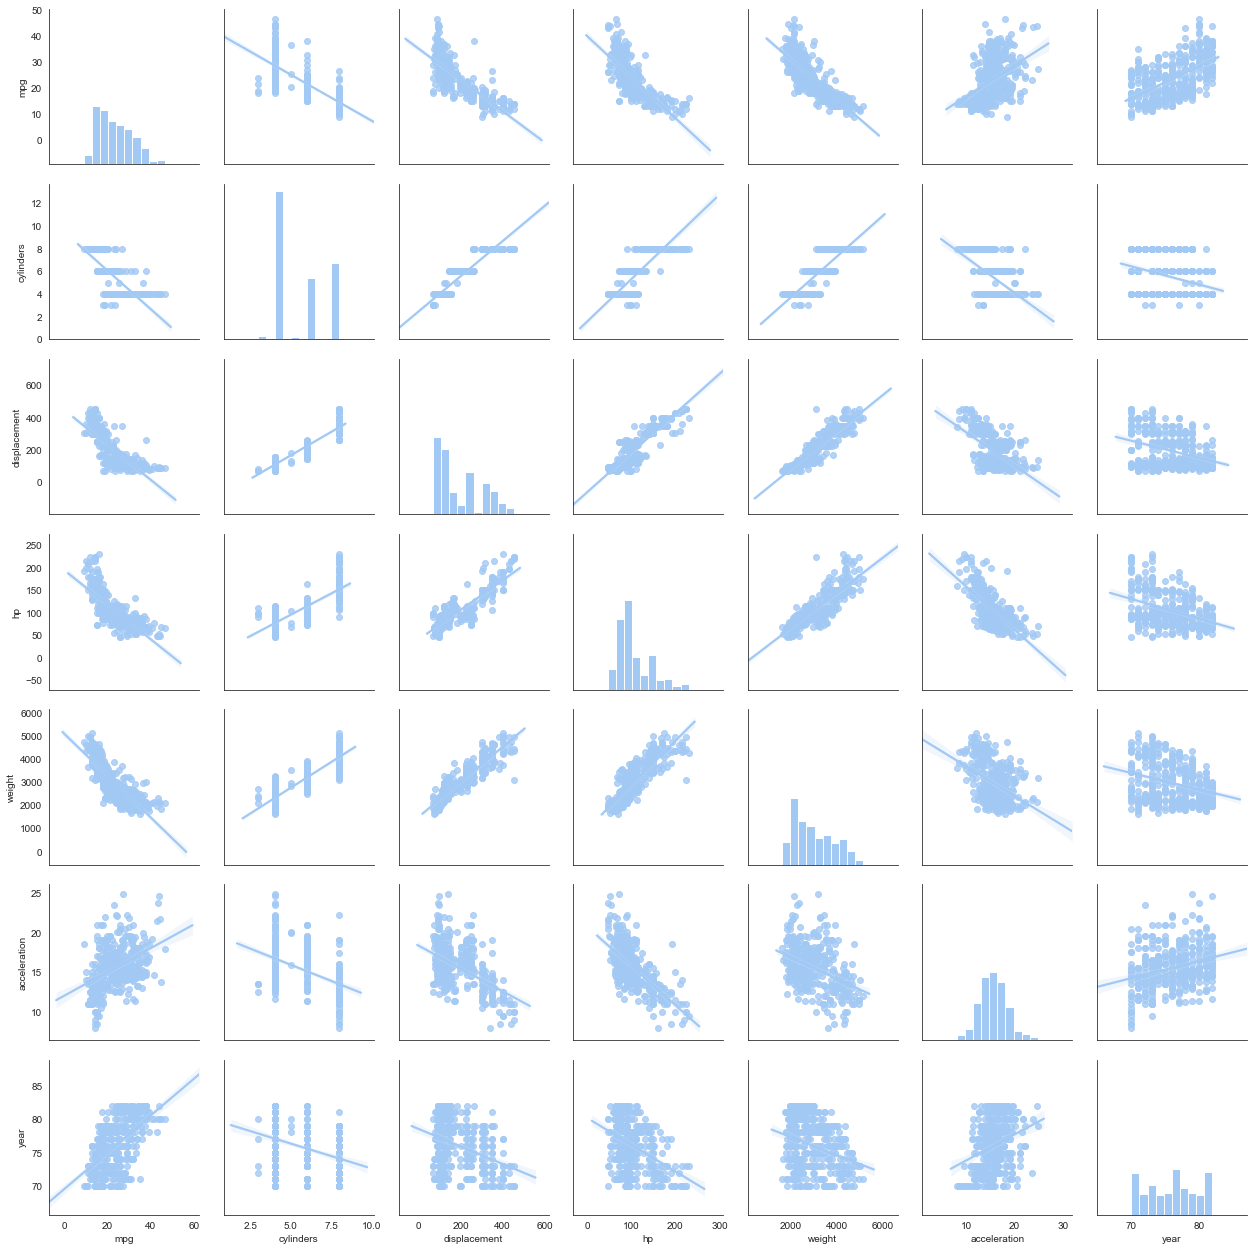

In [14]:
sns.pairplot(d, kind='reg', diag_kind='hist');

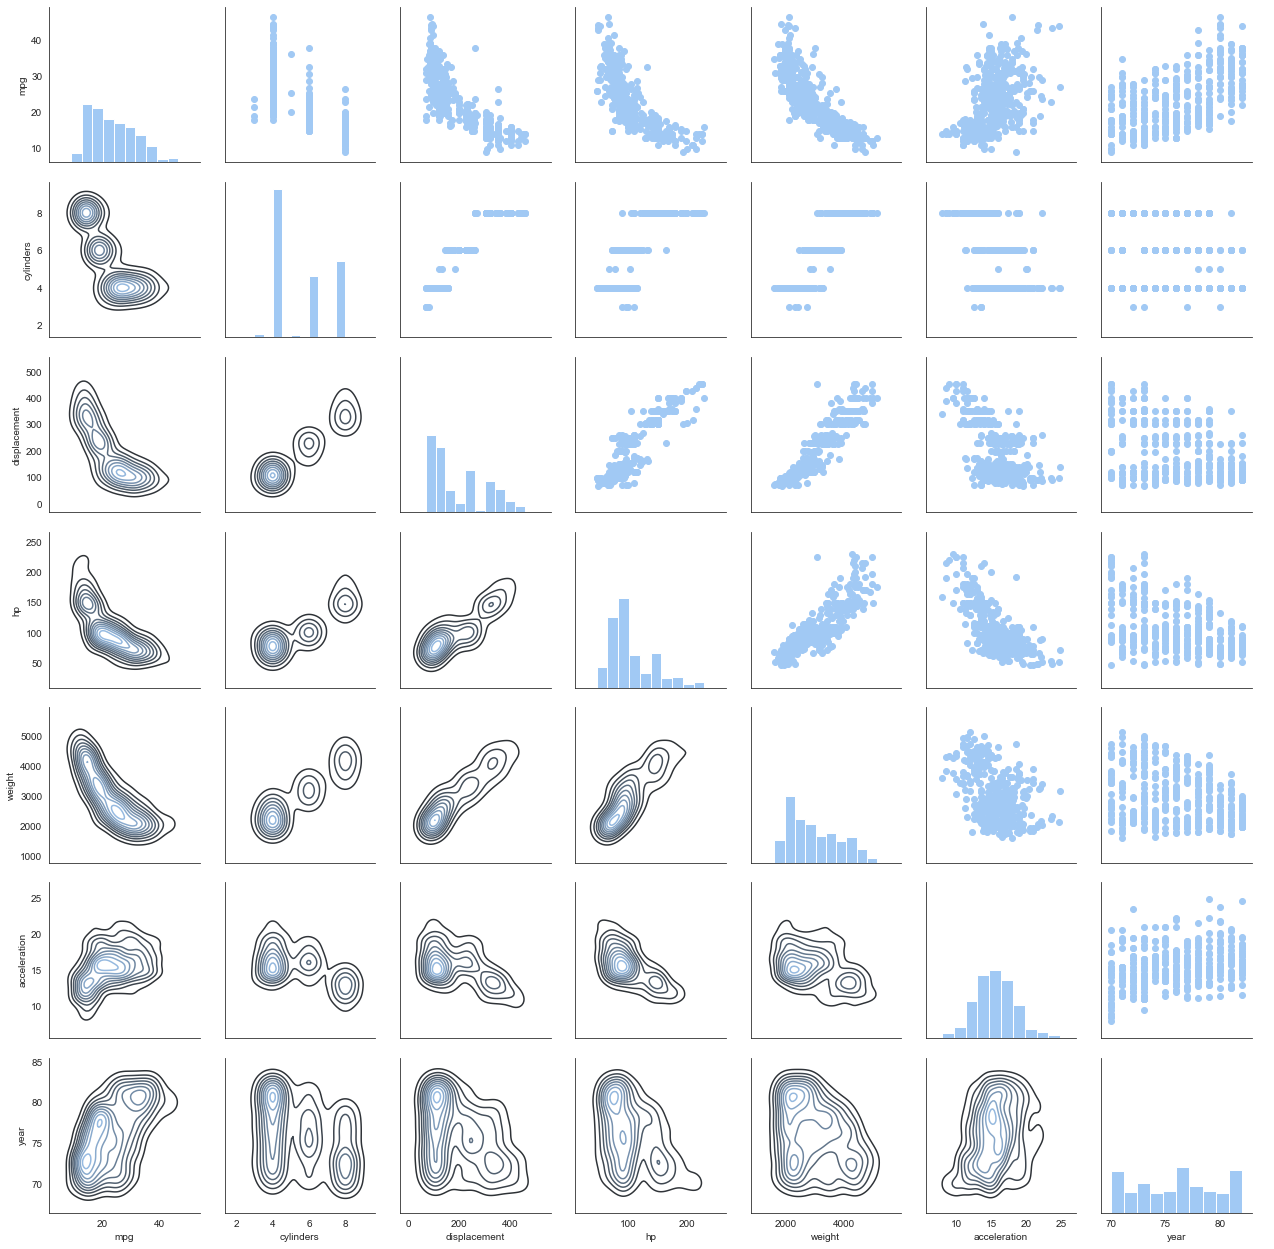

In [15]:
import warnings
warnings.filterwarnings('ignore')

pg = sns.PairGrid(d)
pg = pg.map_diag(plt.hist)
pg = pg.map_upper(plt.scatter)
pg = pg.map_lower(sns.kdeplot)
pg = pg.add_legend();